In [1]:
import yapo as y

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15., 9.)

In [23]:
w=[ 0.35,  0.24,  0.05,  0.36, -0.  , -0.  ,  0.  ]
dict(zip(asset_names, w))

{'ny/SPY': 0.35,
 'ny/VB': 0.24,
 'ny/BIV': 0.05,
 'ny/EDV': 0.36,
 'ny/VNQ': -0.0,
 'ny/VGK': -0.0,
 'ny/GLD': 0.0}

In [24]:
p=y.portfolio(assets=dict(zip(asset_names, w)),
              start_period='2008-2', end_period='2017-8', currency='usd')

In [25]:
p.risk()

TimeSeries(start_period=2008-03, end_period=2017-08, kind=TimeSeriesKind.REDUCED_VALUE, values=[0.11675372]

In [9]:
p.risk(period='month')

TimeSeries(start_period=2008-03, end_period=2017-08, kind=TimeSeriesKind.REDUCED_VALUE, values=[0.03340736]

In [2]:
asset_names = ['ny/SPY', 'ny/VB', 'ny/BIV', 'ny/EDV', 'ny/VNQ', 'ny/VGK', 'ny/GLD']
efficiency_frontier = y.optimal_portfolios(asset_names=asset_names,
                                           start_period='2008-2', end_period='2017-8', currency='usd',
                                           samples_count=10)

SolverError: The solver GUROBI is not installed.

In [16]:
[np.round(p.weights, 2) for p in efficiency_frontier.points]

[array([ 0.01, -0.  ,  0.97, -0.  , -0.  ,  0.01, -0.  ]),
 array([ 0.08, -0.  ,  0.92,  0.  , -0.  , -0.  ,  0.  ]),
 array([ 0.13,  0.01,  0.86,  0.  ,  0.  , -0.  , -0.  ]),
 array([ 0.18,  0.09,  0.65,  0.08, -0.  ,  0.  , -0.  ]),
 array([ 0.22,  0.12,  0.51,  0.15, -0.  ,  0.  ,  0.  ]),
 array([ 0.26,  0.16,  0.38,  0.21,  0.  , -0.  ,  0.  ]),
 array([ 0.3 ,  0.19,  0.24,  0.27,  0.  , -0.  ,  0.  ]),
 array([ 0.27,  0.16,  0.34,  0.23, -0.  , -0.  ,  0.  ]),
 array([ 0.31,  0.2 ,  0.2 ,  0.3 , -0.  , -0.  ,  0.  ]),
 array([ 0.35,  0.24,  0.05,  0.36, -0.  , -0.  ,  0.  ])]

In [34]:
risks

[0.05744970909990709,
 0.05602376604378216,
 0.056694503314729895,
 0.0687627971873375,
 0.0783326893291163,
 0.08883071378479167,
 0.10004536610343018,
 0.09184876195238237,
 0.1039157955995426,
 0.11647093904987399]

In [35]:
returns

[0.04828947009946649,
 0.05200174021108128,
 0.055473854242899634,
 0.06936429581945225,
 0.07827229423201776,
 0.0872482669647956,
 0.09629268522940415,
 0.0897277144423736,
 0.09932213251983635,
 0.10890522981907647]

In [5]:
risks = []
returns = []
returns1 = []
returns2 = []
returns3 = []
_MONTHS_PER_YEAR = 12
for idx, pnt in enumerate(sorted(efficiency_frontier.points, key=lambda x: x.ret)):
    print(idx)
    p=y.portfolio(assets=dict(zip(asset_names, pnt.weights)),
                  start_period='2008-2', end_period='2017-8', currency='usd')
    risks.append(p.risk().value)
    returns.append((p.rate_of_return().values.mean() + 1.) ** _MONTHS_PER_YEAR - 1.)
    returns1.append(p.rate_of_return().values.mean())
    returns2.append(pnt.ret)
    returns3.append(pnt.ret1)

0
1
2
3
4
5
6
7
8
9


In [11]:
np.diff(np.array(sorted(returns3)))

array([0.00030124, 0.00029568, 0.00109514, 0.00069542, 0.00069542,
       0.00019187, 0.00050355, 0.00023237, 0.00072924])

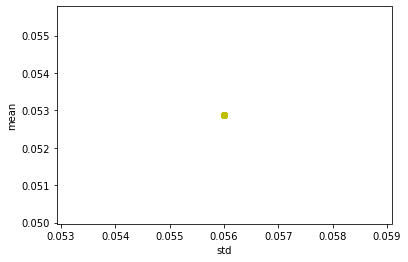

In [7]:
plt.ylabel('mean')
plt.xlabel('std')
_ = plt.plot(risks, returns2, 'y-o')

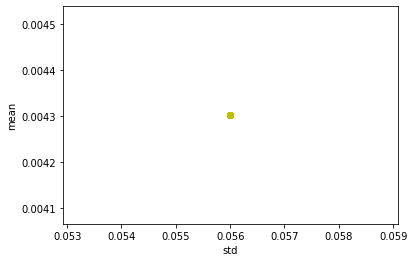

In [8]:
plt.ylabel('mean')
plt.xlabel('std')
_ = plt.plot(risks, returns3, 'y-o')

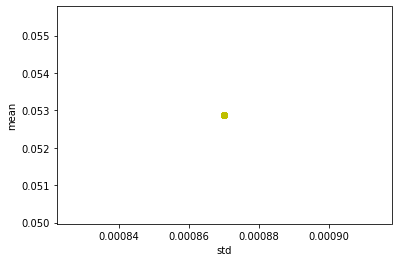

In [9]:
risks = [p.risk for p in efficiency_frontier.points]
returns = [p.ret for p in efficiency_frontier.points]

plt.ylabel('mean')
plt.xlabel('std')
_ = plt.plot(risks, returns, 'y-o')